# Examen SVM

**Nom :** SOSSOU Didi Orlog  
**Formation :** IA Big Data - EPL  
**Année :** 2024/2025  
**Master :** IA-BigData/IS  
**Matière :** Optimisation - SVM  

## 1. Importer les données

In [1]:
# Import des bibliothèques et chargement des données
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
import pandas as pd

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
print("Bibliothèques importées avec succès.")

Bibliothèques importées avec succès.


In [2]:
# Chargement du jeu de données Iris
iris = datasets.load_iris()
# Affichage des informations sur le dataset
print("Informations sur le jeu de données Iris:")
print(f"Nombre d'échantillons: {iris.data.shape[0]}")
print(f"Nombre de caractéristiques: {iris.data.shape[1]}")
print(f"Classes: {iris.target_names}")
print(f"Noms des caractéristiques: {iris.feature_names}")
print(f"Aperçu des données:")
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris.head(10)

Informations sur le jeu de données Iris:
Nombre d'échantillons: 150
Nombre de caractéristiques: 4
Classes: ['setosa' 'versicolor' 'virginica']
Noms des caractéristiques: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Aperçu des données:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## 2. Se restreindre à 2 caractéristiques et aux classes 0 et 1

In [3]:
# Sélection des 2 premières caractéristiques
X, y = iris.data[:, :2], iris.target

# Filtrage pour ne garder que les classes 0 et 1
X = X[y != 2, :2]
y = y[y != 2]  # Les labels associés à chaque enregistrement

print(f"Nombre d'échantillons après filtrage: {X.shape[0]}")
print(f"Nombre de caractéristiques: {X.shape[1]}")
print(f"Classes conservées: {np.unique(y)}")
print(f"Classe 0 (setosa): {np.sum(y == 0)} échantillons")
print(f"Classe 1 (versicolor): {np.sum(y == 1)} échantillons")

Nombre d'échantillons après filtrage: 100
Nombre de caractéristiques: 2
Classes conservées: [0 1]
Classe 0 (setosa): 50 échantillons
Classe 1 (versicolor): 50 échantillons


## 3. SVM linéaire - Frontières de séparation et visualisation

Précision du SVM linéaire: 1.0000
Nombre de vecteurs de support: 16
Coefficients w: [ 2.22720466 -2.24959915]
Biais b: -4.9418


C:\Users\didis\AppData\Local\Temp\ipykernel_22952\1095991061.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yh, 'k--', linewidth=1.5, color='#E74C3C', label='Marges (±1)')
C:\Users\didis\AppData\Local\Temp\ipykernel_22952\1095991061.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yb, 'k--', linewidth=1.5, color='#E74C3C')


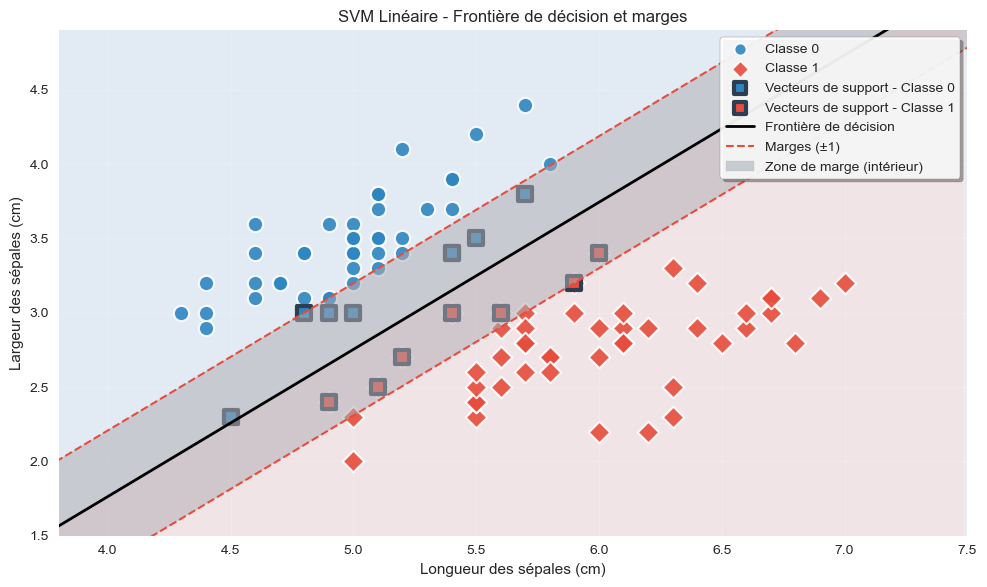

In [4]:
# Entraînement du SVM linéaire
svm_linear = svm.SVC(kernel='linear', C=1.0)
svm_linear.fit(X, y)

# Évaluation des performances
y_pred_linear = svm_linear.predict(X)
accuracy_linear = accuracy_score(y, y_pred_linear)

print(f"Précision du SVM linéaire: {accuracy_linear:.4f}")
print(f"Nombre de vecteurs de support: {len(svm_linear.support_)}")
print(f"Coefficients w: {svm_linear.coef_[0]}")
print(f"Biais b: {svm_linear.intercept_[0]:.4f}")

# Visualisation avec couleurs cohérentes
plt.figure(figsize=(10, 6))

# Définir les couleurs coordonnées pour chaque classe
colors = ['#2E86C1', '#E74C3C']  # Bleu pour classe 0, Rouge pour classe 1
color_zones = ['#D6EAF8', '#FADBD8']  # Fond bleu clair, Fond rouge clair
markers = ['o', 'D']  # Cercle pour classe 0, Diamant pour classe 1
labels = ['Classe 0', 'Classe 1']

# Création d'une grille pour colorier les zones de décision
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Prédiction sur la grille pour colorier les zones
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Coloration des zones de décision
plt.contourf(xx, yy, Z, alpha=0.4, colors=color_zones, levels=[-0.5, 0.5, 1.5])

# Tracé des points de données
for i, (color, marker, label) in enumerate(zip(colors, markers, labels)):
    mask = (y == i)
    plt.scatter(X[mask, 0], X[mask, 1], c=color, marker=marker, s=120, 
                edgecolor='white', linewidth=1.5, label=label, alpha=0.9)

# Mise en évidence des vecteurs de support avec leurs couleurs de classe
support_vectors = svm_linear.support_vectors_
support_indices = svm_linear.support_
support_labels = y[support_indices]

# Tracer les vecteurs de support avec leurs couleurs de classe 
for i, (color, marker) in enumerate(zip(colors, markers)):
    sv_mask = (support_labels == i)
    if np.any(sv_mask):
        plt.scatter(support_vectors[sv_mask, 0], support_vectors[sv_mask, 1], 
                   c=color, marker='s', s=100, edgecolor='#2C3E50', 
                   linewidth=3, alpha=1.0, 
                   label=f'Vecteurs de support - Classe {i}')


xx = np.array([1, 13])

# Les ordonnées de la frontière sont données par :
yf = -svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*xx - svm_linear.intercept_/svm_linear.coef_[0][1]

# Les ordonnées de la marge du côté bas sont données par :
yb = -svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*xx - (svm_linear.intercept_-1.0)/svm_linear.coef_[0][1]

# Les ordonnées de la marge du côté haut sont données par :
yh = -svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*xx - (svm_linear.intercept_+1.0)/svm_linear.coef_[0][1]

# Tracé de la frontière de décision et des marges
plt.plot(xx, yf, 'k-', linewidth=2, label='Frontière de décision')
plt.plot(xx, yh, 'k--', linewidth=1.5, color='#E74C3C', label='Marges (±1)')
plt.plot(xx, yb, 'k--', linewidth=1.5, color='#E74C3C')

# Zone de marge avec couche grise foncée
plt.fill_between(xx, yh, yb, alpha=0.4, color='#85929E', label='Zone de marge (intérieur)')
plt.fill_between(xx, yh, yb, alpha=0.2, color='#FADBD8')

plt.xlabel('Longueur des sépales (cm)')
plt.ylabel('Largeur des sépales (cm)')
plt.title('SVM Linéaire - Frontière de décision et marges')
legend = plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
                   facecolor='white', edgecolor='gray', loc='upper right', 
                   bbox_to_anchor=(1.0, 1.0), fontsize=10, markerscale=0.8)
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()

Le modèle SVM linéaire atteint une précision parfaite (100%) sur ces données linéairement séparables avec une frontière de décision optimale. Il utilise 16 vecteurs de support situés exactement sur les marges, créant une zone de séparation maximale entre les classes.

## 4. SVM à noyau RBF

Précision du SVM RBF: 1.0000
Nombre de vecteurs de support: 22


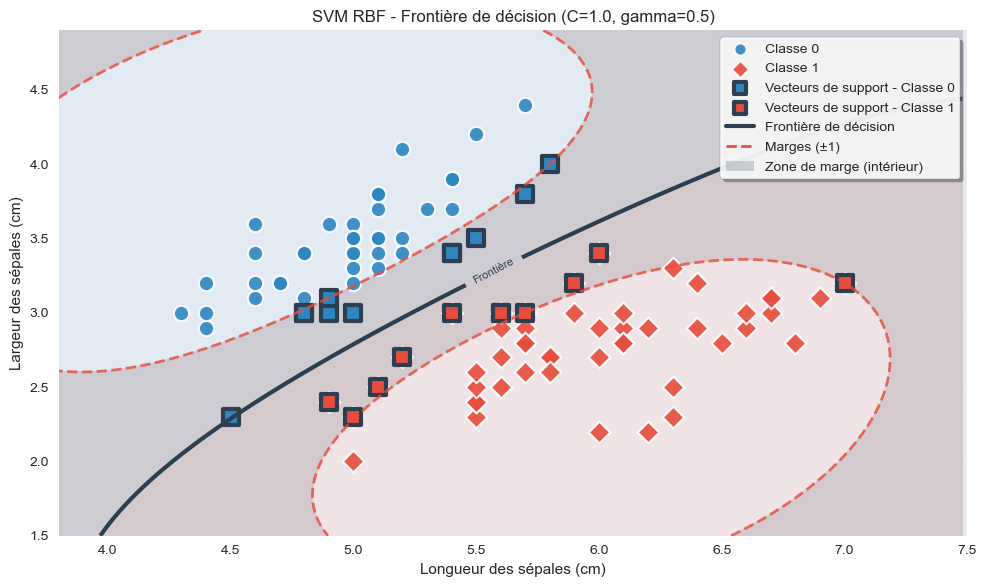

In [5]:
# Définir les paramètres pour le SVM RBF
C = 1.0
gamma = 0.5

# Entraînement du SVM RBF
clf_rbf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
clf_rbf.fit(X, y)

# Prédictions et précision
y_pred_rbf = clf_rbf.predict(X)
accuracy_rbf = accuracy_score(y, y_pred_rbf)
print(f"Précision du SVM RBF: {accuracy_rbf:.4f}")
print(f"Nombre de vecteurs de support: {len(clf_rbf.support_vectors_)}")

# Fonction de visualisation avec couleurs cohérentes
def visualize_svm_nonlinear(clf, X, y, title, kernel_params=""):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Définir les couleurs coordonnées pour chaque classe
    colors = ['#2E86C1', '#E74C3C']  # Bleu pour classe 0, Rouge pour classe 1
    color_zones = ['#D6EAF8', '#FADBD8']  # Fond bleu clair, Fond rouge clair
    markers = ['o', 'D']  # Cercle pour classe 0, Diamant pour classe 1
    labels = ['Classe 0', 'Classe 1']
    
    # Créer une grille pour visualiser les zones de décision
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Prédictions pour la grille
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Calcul des distances à la frontière pour les marges
    Z_distances = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z_distances = Z_distances.reshape(xx.shape)
    
    # Afficher les zones de décision avec couleurs coordonnées
    ax.contourf(xx, yy, Z, alpha=0.4, colors=color_zones, levels=[-0.5, 0.5, 1.5])
    
    # Afficher les marges avec des couleurs distinctes
    # Marge positive (distance = +1)
    ax.contour(xx, yy, Z_distances, levels=[1.0], colors='#E74C3C', linewidths=2, 
               linestyles='dashed', alpha=0.8)
    # Marge négative (distance = -1)  
    ax.contour(xx, yy, Z_distances, levels=[-1.0], colors='#E74C3C', linewidths=2, 
               linestyles='dashed', alpha=0.8)
    
    # Zone de marge (entre -1 et +1) avec couche grise foncée
    ax.contourf(xx, yy, Z_distances, levels=[-1.0, 1.0], colors=['#85929E'], alpha=0.4)
    ax.contourf(xx, yy, Z_distances, levels=[-1.0, 1.0], colors=['#FADBD8'], alpha=0.3)
    
    # Tracer les points de chaque classe avec leurs couleurs coordonnées
    for i, (color, marker, label) in enumerate(zip(colors, markers, labels)):
        mask = (y == i)
        ax.scatter(X[mask, 0], X[mask, 1], c=color, marker=marker, s=120, 
                   edgecolor='white', linewidth=1.5, label=label, alpha=0.9)
    
    # Mettre en évidence les vecteurs de support avec leurs couleurs de classe
    support_vectors = clf.support_vectors_
    support_indices = clf.support_
    support_labels = y[support_indices]
    
    # Tracer les vecteurs de support avec leurs couleurs de classe
    for i, (color, marker) in enumerate(zip(colors, markers)):
        sv_mask = (support_labels == i)
        if np.any(sv_mask):
            ax.scatter(support_vectors[sv_mask, 0], support_vectors[sv_mask, 1], 
                      c=color, marker='s', s=120, edgecolor='#2C3E50', 
                      linewidth=3, alpha=1.0, 
                      label=f'Vecteurs de support - Classe {i}')
    
    # Tracer la frontière de décision (distance = 0)
    contour_decision = ax.contour(xx, yy, Z_distances, levels=[0], colors='#2C3E50', linewidths=3)
    ax.clabel(contour_decision, inline=True, fontsize=8, fmt='Frontière')
    
    # Ajouter les légendes pour les marges et frontière
    from matplotlib.patches import Patch
    legend_elements = [
        plt.Line2D([0], [0], color='#2C3E50', linewidth=3, label='Frontière de décision'),
        plt.Line2D([0], [0], color='#E74C3C', linewidth=2, linestyle='--', label='Marges (±1)'),
        Patch(facecolor='#85929E', alpha=0.4, label='Zone de marge (intérieur)')
    ]
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Longueur des sépales (cm)')
    ax.set_ylabel('Largeur des sépales (cm)')
    ax.set_title(f'{title}{kernel_params}')
    
    # Créer la légende avec tous les éléments 
    handles, labels = ax.get_legend_handles_labels()
    # Ajouter les éléments de marge et frontière
    handles.extend(legend_elements)
    
    # Créer la légende finale
    legend = ax.legend(handles, [h.get_label() for h in handles], 
                      frameon=True, fancybox=True, shadow=True, framealpha=0.9, 
                      facecolor='white', edgecolor='gray', loc='upper right', 
                      bbox_to_anchor=(1.0, 1.0), fontsize=10, markerscale=0.8)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualiser le SVM RBF
visualize_svm_nonlinear(clf_rbf, X, y, "SVM RBF - Frontière de décision", f" (C={C}, gamma={gamma})")

Le noyau RBF atteint une précision parfaite (100%) mais nécessite 22 vecteurs de support, soit plus que le SVM linéaire, ce qui indique une complexité plus élevée. Sa frontière de décision non-linéaire s'adapte parfaitement aux contours complexes des données.

## 5. SVM à noyau polynomial

Précision du SVM polynomial: 1.0000
Nombre de vecteurs de support: 3


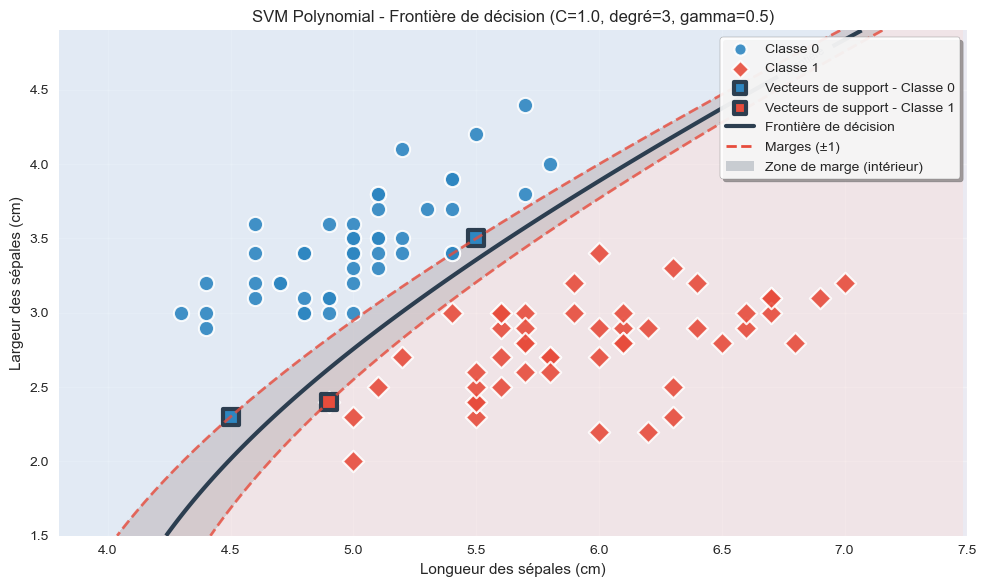

In [6]:
# Paramètres pour le SVM polynomial
C_poly = 1.0
degree = 3
gamma_poly = 0.5

# Entraînement du SVM polynomial
clf_poly = svm.SVC(kernel='poly', C=C_poly, degree=degree, gamma=gamma_poly)
clf_poly.fit(X, y)

# Prédictions et précision
y_pred_poly = clf_poly.predict(X)
accuracy_poly = accuracy_score(y, y_pred_poly)
print(f"Précision du SVM polynomial: {accuracy_poly:.4f}")
print(f"Nombre de vecteurs de support: {len(clf_poly.support_vectors_)}")

# Visualiser le SVM polynomial
visualize_svm_nonlinear(clf_poly, X, y, "SVM Polynomial - Frontière de décision", f" (C={C_poly}, degré={degree}, gamma={gamma_poly})")

Le noyau polynomial de degré 3 offre le meilleur compromis avec une précision parfaite (100%) et seulement 3 vecteurs de support. Sa frontière courbe et ses marges régulières capturent optimalement la structure des données sans surapprentissage, contrairement au RBF plus complexe ou au linéaire trop rigide. Cette configuration représente l'équilibre idéal entre simplicité et flexibilité pour nos données.